In [1]:
!pip install fastai==1.0.42

import torchvision
from fastai import *
from fastai.vision import *
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score

torch.cuda.is_available()
torch.backends.cudnn.enabled

    100% |████████████████████████████████| 163kB 1.0MB/s ta 0:00:01
  Found existing installation: fastai 1.0.45
    Uninstalling fastai-1.0.45:
      Successfully uninstalled fastai-1.0.45
You are using pip version 18.1, however version 21.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


True

In [2]:
def quadratic_kappa(y_hat, y):
    return torch.tensor(cohen_kappa_score(torch.argmax(y_hat,1), y, weights='quadratic'),device='cuda:0')

In [3]:
base_image_dir = "../input/dr-augmentedr/dr/upload/"
df = pd.read_csv("../input/dr-augmentedr/dr.csv")
df.columns = ['image', 'level']
df['path'] = df['image'].map(lambda x: os.path.join(base_image_dir,'{}.png'.format(x)))
df['exists'] = df['path'].map(os.path.exists) #Most of the files do not exist because this is a sample of the original dataset
df = df[df['exists']]
df = df.drop(columns=['image','exists'])
df = df.sample(frac=1).reset_index(drop=True) #shuffle dataframe

In [4]:
bs = 32
sz=256

train_df, val_df = train_test_split(df,test_size=0.2)
df = pd.concat([train_df,val_df])

tfms = get_transforms(do_flip=True,flip_vert=True,max_rotate=360,max_warp=0,max_zoom=1.1,max_lighting=0.1,p_lighting=0.5)
src = (ImageItemList.from_df(df=df,path='./',cols='path') 
        .split_by_idx(range(len(train_df)-1,len(df))) 
        .label_from_df(cols='level')
      )
data= (src.transform(tfms,size=sz) 
        .databunch(bs=bs,num_workers=0) 
        .normalize(imagenet_stats)
       )

learn = create_cnn(data, models.resnet50, metrics = [accuracy,quadratic_kappa])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:03<00:00, 29240062.27it/s]


In [5]:
learn.freeze()
learn.fit_one_cycle(8,max_lr = 2e-3)
learn.unfreeze()
learn.fit_one_cycle(8,max_lr = slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,quadratic_kappa
1,1.484150,1.175502,0.506925,0.732394
2,1.304700,1.119071,0.481994,0.759482
3,1.131284,0.935999,0.551247,0.815518
4,1.001807,0.928686,0.576177,0.819183
5,0.901955,0.861032,0.612188,0.844458
6,0.814811,0.819396,0.628809,0.851600
7,0.761944,0.805062,0.634349,0.857500
8,0.734847,0.802124,0.623269,0.851432


epoch,train_loss,valid_loss,accuracy,quadratic_kappa
1,0.689985,0.804198,0.626039,0.860031
2,0.707380,0.814834,0.626039,0.859317
3,0.680315,0.798220,0.634349,0.848766
4,0.675303,0.779859,0.645429,0.861140
5,0.674139,0.781427,0.659280,0.874434
6,0.667410,0.789793,0.667590,0.870864
7,0.630414,0.790178,0.653740,0.868771
8,0.604844,0.792259,0.664820,0.869168


In [6]:
data = (src.transform(tfms,size=sz*2) #Data augmentation
        .databunch(bs=bs,num_workers=0) #DataBunch
        .normalize(imagenet_stats) #Normalize
       )

In [7]:
learn.data = data
learn.freeze()
learn.fit_one_cycle(8,max_lr = 2e-3)
learn.unfreeze()
learn.fit_one_cycle(8,max_lr = slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,quadratic_kappa
1,0.822842,0.880504,0.617729,0.865366
2,0.780429,0.874450,0.590028,0.848753
3,0.767835,0.871781,0.595568,0.786532
4,0.720043,0.800421,0.656510,0.874301
5,0.669308,0.726323,0.653740,0.870744
6,0.603918,0.654413,0.717452,0.905587
7,0.549531,0.641107,0.717452,0.900311
8,0.517440,0.640366,0.717452,0.907714


epoch,train_loss,valid_loss,accuracy,quadratic_kappa
1,0.498090,0.632578,0.731302,0.912757
2,0.512491,0.631875,0.734072,0.915486
3,0.501382,0.636073,0.725762,0.906350
4,0.473081,0.636866,0.717452,0.903594
5,0.455864,0.613286,0.736842,0.910989
6,0.444476,0.605398,0.745152,0.912540
7,0.437747,0.613590,0.747922,0.920365
8,0.425368,0.606824,0.742382,0.911331


In [8]:
base_image_dir = '../input/aptos-augmented/aptos/upload/'
df = pd.read_csv('../input/aptos-augmented/aptos.csv')
df.columns = ['image', 'level']
df['path'] = df['image'].map(lambda x: os.path.join(base_image_dir,'{}.png'.format(x)))
df['exists'] = df['path'].map(os.path.exists) #Most of the files do not exist because this is a sample of the original dataset
df = df[df['exists']]
df = df.drop(columns=['image','exists'])
df = df.sample(frac=1).reset_index(drop=True) #shuffle dataframe
df.head(10)

,level,path
0,3,../input/aptos-augmented/aptos/upload/ba3d8c81...
1,0,../input/aptos-augmented/aptos/upload/b963a116...
2,3,../input/aptos-augmented/aptos/upload/23245085...
3,1,../input/aptos-augmented/aptos/upload/ca30a97e...
4,3,../input/aptos-augmented/aptos/upload/60a1c394...
5,3,../input/aptos-augmented/aptos/upload/042470a9...
6,2,../input/aptos-augmented/aptos/upload/f2c5d1cc...
7,0,../input/aptos-augmented/aptos/upload/51af8a68...
8,4,../input/aptos-augmented/aptos/upload/f8a9b082...
9,4,../input/aptos-augmented/aptos/upload/f03d3c4c...


In [9]:
bs = 32
sz=256

train_df, val_df = train_test_split(df,test_size=0.2)
df = pd.concat([train_df,val_df])

tfms = get_transforms(do_flip=True,flip_vert=True,max_rotate=360,max_warp=0,max_zoom=1.1,max_lighting=0.1,p_lighting=0.5)
src = (ImageItemList.from_df(df=df,path='./',cols='path') 
        .split_by_idx(range(len(train_df)-1,len(df))) 
        .label_from_df(cols='level')
      )
data= (src.transform(tfms,size=sz) 
        .databunch(bs=bs,num_workers=0) 
        .normalize(imagenet_stats)
       )

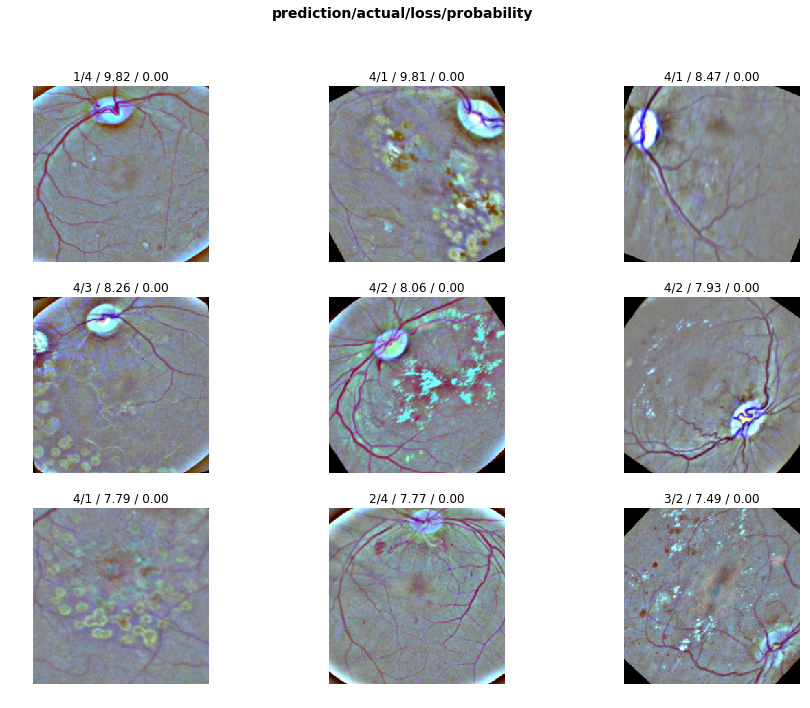

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

In [12]:
learn.data = data
learn.freeze()
learn.fit_one_cycle(8,max_lr = 2e-3)
learn.unfreeze()
learn.fit_one_cycle(8,max_lr = slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,quadratic_kappa
1,0.899662,0.749648,0.699650,0.775029
2,0.774658,0.653861,0.739130,0.816221
3,0.704414,0.646381,0.741129,0.847228
4,0.614093,0.560793,0.775612,0.849303
5,0.564342,0.463520,0.821089,0.877913
6,0.482166,0.401127,0.838581,0.902752
7,0.424771,0.357688,0.861069,0.916861
8,0.398253,0.350496,0.863068,0.918152


epoch,train_loss,valid_loss,accuracy,quadratic_kappa
1,0.394335,0.350320,0.858071,0.913966
2,0.403676,0.334043,0.867566,0.920430
3,0.362220,0.317151,0.872564,0.918952
4,0.322964,0.290848,0.883558,0.931546
5,0.301591,0.272827,0.892554,0.935242
6,0.284422,0.251090,0.901049,0.939882
7,0.276563,0.250432,0.899050,0.938003
8,0.258306,0.250115,0.898551,0.936962


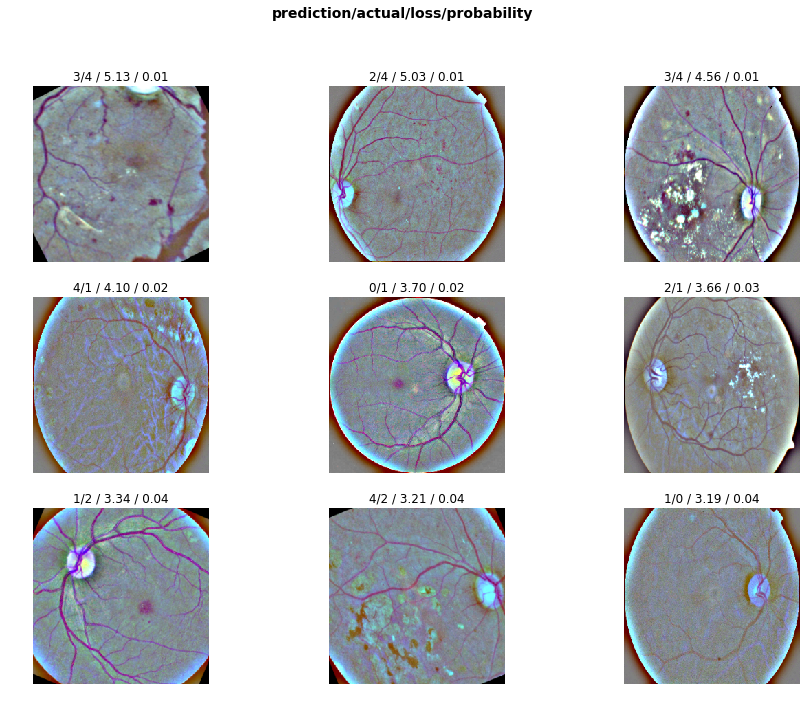

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

In [14]:
data = (src.transform(tfms,size=sz*2) #Data augmentation
        .databunch(bs=bs,num_workers=0) #DataBunch
        .normalize(imagenet_stats) #Normalize
       )

In [ ]:
learn.data = data
learn.freeze()
learn.fit_one_cycle(8,max_lr = 2e-3)
learn.unfreeze()
learn.fit_one_cycle(8,max_lr = slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,quadratic_kappa


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))